In [9]:
import numpy as np

In [10]:
x = np.random.random((10,3))   # Task 1
print(x)
print(x[np.arange(10), np.argmin(np.abs(x - 0.5), axis = 1)])

[[0.97022947 0.93406823 0.79569365]
 [0.08425607 0.97882696 0.5508313 ]
 [0.51381986 0.85500598 0.97141413]
 [0.25944414 0.1900018  0.3956618 ]
 [0.73842326 0.54346923 0.38347673]
 [0.55157598 0.39373767 0.770918  ]
 [0.14392077 0.65658485 0.22097642]
 [0.01996348 0.82300824 0.59749814]
 [0.45364082 0.04564037 0.26149908]
 [0.2611985  0.99841113 0.38366534]]
[0.79569365 0.5508313  0.51381986 0.3956618  0.54346923 0.55157598
 0.65658485 0.59749814 0.45364082 0.38366534]


In [11]:
x = np.random.random((6,6))   # Task 2
print(x)
print([np.sum(x[i])/(np.min([x[j][i] for j in range(6)])) for i in range(6)])

[[0.11374107 0.13978806 0.93742494 0.89674021 0.24459611 0.3393049 ]
 [0.00928865 0.44909188 0.68404506 0.94960267 0.49224049 0.47740535]
 [0.73282092 0.95151731 0.80457138 0.13809223 0.63850831 0.36340759]
 [0.12170024 0.31649383 0.61707987 0.46120745 0.0654062  0.94410156]
 [0.06859245 0.9062638  0.5759473  0.74220072 0.00973614 0.43198761]
 [0.81643515 0.14427709 0.89427191 0.5935738  0.1700167  0.79638419]]
[287.61948355207653, 21.90225789549152, 6.30078089579819, 18.29204382600435, 280.8841928362871, 10.064572624775108]


In [12]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])   # Task 3
print(np.max([x[np.where(x==0)[0][i]+1] for i in range(np.sum(x==0)-np.sum(x[len(x)-1]==0))]))

5


In [13]:
x = np.ones(10)               # Task 4
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print([x[j]+np.sum(i==j) for j in range(10)])

[2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, 1.0, 2.0, 1.0]


In [14]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:5]

array([['0001', 'Male', '19', '15', '39'],
       ['0002', 'Male', '21', '15', '81'],
       ['0003', 'Female', '20', '16', '6'],
       ['0004', 'Female', '23', '16', '77'],
       ['0005', 'Female', '31', '17', '40']], dtype=object)

In [15]:
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
data[:5]

array([[ 1.,  1., 19., 15., 39.],
       [ 2.,  1., 21., 15., 81.],
       [ 3.,  0., 20., 16.,  6.],
       [ 4.,  0., 23., 16., 77.],
       [ 5.,  0., 31., 17., 40.]])

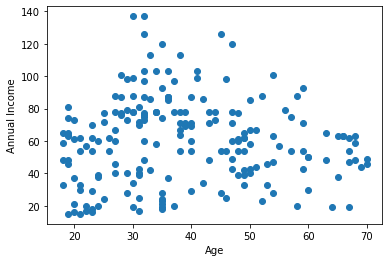

In [16]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

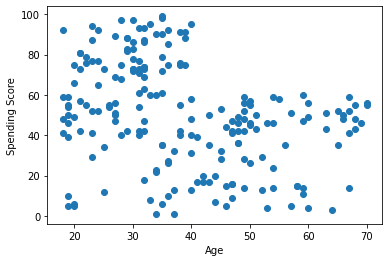

In [17]:
plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

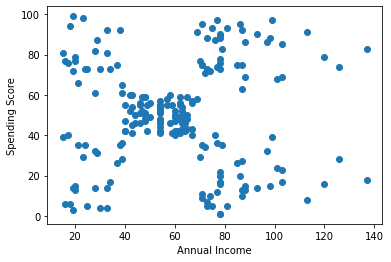

In [18]:
plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [19]:
def standardization(data):   # Нормализация данных
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    return (data - mean)/std

In [20]:
import numpy.random 
from scipy.spatial import distance

In [21]:
def kmeans(obs, k_or_guess, iter=20, thresh=1e-05): #k_or_guess has int or ndarray type
    if type(k_or_guess) == int:
        arr = obs[np.random.choice(range(len(obs)), k_or_guess, False)]
    else:
        arr = k_or_guess
    prev_dist = -1
    cur_dist = distance.cdist(obs, arr, 'sqeuclidean').min(axis = 1).sum()
    
    while abs(cur_dist - prev_dist) > thresh:
        new_arr = np.empty((len(arr),len(arr[0])))
        dist = distance.cdist(obs, arr, 'sqeuclidean')
        temp = np.hstack((obs, dist.argmin(axis=1).reshape(len(dist),1)))
        for i in range(len(arr)):
            new_arr[i] = temp[temp[:, -1] == i].mean(axis=0)[:-1]
        arr = new_arr
        prev_dist = cur_dist
        cur_dist = distance.cdist(obs, arr, 'sqeuclidean').min(axis = 1).sum()
        
    return arr, cur_dist

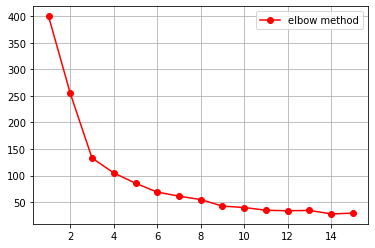

In [25]:
standardized = standardization(data[:,2:])
dist_k = np.empty(15)                          # Elbow-метод для категорий возраст-годовой доход
for i in range(1,16):
    codebook, distor = kmeans(standardized[:,[0,1]], i)
    dist_k[i-1] = distor
plt.plot(range(1,16), dist_k, 'o-r', label = "elbow method")
plt.legend()
plt.grid(True)

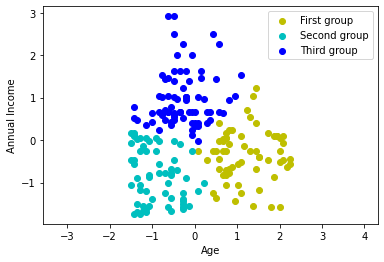

In [35]:
codebook, distor = kmeans(standardized[:,[0,1]], 3)    # Найдя оптимальное k, разделяем на k кластеров(тут k=3)

distortion = distance.cdist(standardized[:,[0,1]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[0,1]], distortion.argmin(axis=1).reshape(len(distortion),1)))
part1 = matrix[matrix[:, -1] == 0]
part2 = matrix[matrix[:, -1] == 1]
part3 = matrix[matrix[:, -1] == 2]

plt.scatter(part1[:,0], part1[:,1], c='y', label='First group')
plt.scatter(part2[:,0], part2[:,1], c='c', label='Second group')
plt.scatter(part3[:,0], part3[:,1], c='b', label='Third group')
plt.axis('equal')
plt.xlabel("Age")
plt.ylabel('Annual Income')
plt.legend()
plt.show()
# Видно, что годовой доход людей двух кластеров(молодые люди и люди старшего возраста) меньше, чем у людей
# третьего кластера(в основном люди среднего возраста) - довольно показательно.

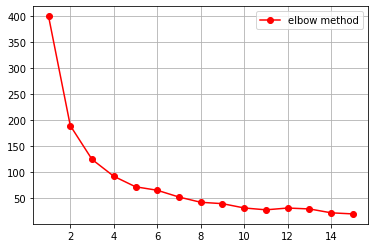

In [27]:
dist_k = np.empty(15)                        # Elbow-метод для категорий возраст-затраты
for i in range(1,16):
    codebook, distor = kmeans(standardized[:,[0,2]], i)
    dist_k[i-1] = distor
plt.plot(range(1,16), dist_k, 'o-r', label = "elbow method")
plt.legend()
plt.grid(True)

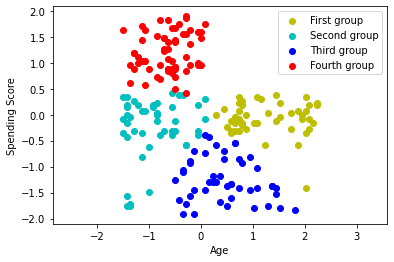

In [28]:
codebook, distor = kmeans(standardized[:,[0,2]], 4)     # Найдя оптимальное k, разделяем на k кластеров(тут k=4)

distortion = distance.cdist(standardized[:,[0,2]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[0,2]], distortion.argmin(axis=1).reshape(len(distortion),1)))
part1 = matrix[matrix[:, -1] == 0]
part2 = matrix[matrix[:, -1] == 1]
part3 = matrix[matrix[:, -1] == 2]
part4 = matrix[matrix[:, -1] == 3]


plt.scatter(part1[:,0], part1[:,1], c='y', label='First group')
plt.scatter(part2[:,0], part2[:,1], c='c', label='Second group')
plt.scatter(part3[:,0], part3[:,1], c='b', label='Third group')
plt.scatter(part4[:,0], part4[:,1], c='r', label='Fourth group')

plt.axis('equal')
plt.xlabel("Age")
plt.ylabel('Spending Score')
plt.legend()
plt.show()
# Люди 4го кластера(довольно молодые) выделяются как тратящие больше всего, остальные 3 кластера распределены не
# так густо, хотя в 3 кластере заметны люди среднего возраста, тратящие меньше остальных.

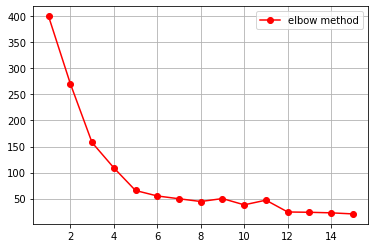

In [31]:
dist_k = np.empty(15)                       # Elbow-метод для категорий годовой доход-затраты
for i in range(1,16):
    codebook, distor = kmeans(standardized[:,[1,2]], i)
    dist_k[i-1] = distor
plt.plot(range(1,16), dist_k, 'o-r', label = "elbow method")
plt.legend()
plt.grid(True)

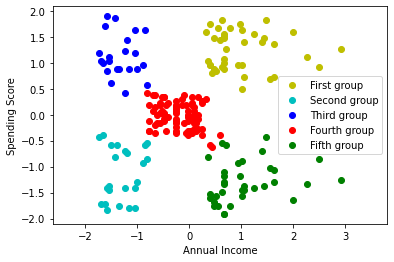

In [33]:
codebook, distor = kmeans(standardized[:,[1,2]], 5)   # Найдя оптимальное k, разделяем на k кластеров(тут k=5)

distortion = distance.cdist(standardized[:,[1,2]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[1,2]], distortion.argmin(axis=1).reshape(len(distortion),1)))
part1 = matrix[matrix[:, -1] == 0]
part2 = matrix[matrix[:, -1] == 1]
part3 = matrix[matrix[:, -1] == 2]
part4 = matrix[matrix[:, -1] == 3]
part5 = matrix[matrix[:, -1] == 4]


plt.scatter(part1[:,0], part1[:,1], c='y', label='First group')
plt.scatter(part2[:,0], part2[:,1], c='c', label='Second group')
plt.scatter(part3[:,0], part3[:,1], c='b', label='Third group')
plt.scatter(part4[:,0], part4[:,1], c='r', label='Fourth group')
plt.scatter(part5[:,0], part5[:,1], c='g', label='Fifth group')


plt.axis('equal')
plt.xlabel("Annual Income")
plt.ylabel('Spending Score')
plt.legend()
plt.show()
# 5 кластеров распределены довольно равномерно. Выделяется четвёртый кластер со средним годовым доходом и средними
# затратами - показательно.